In [2]:
import numpy as np
import pandas as pd
from scipy.stats import chisquare
import scipy.optimize as opt
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [3]:
df = pd.read_table(r"XYZData/394XYZ.txt", skiprows=3, sep='\t', header=None, names=['X', 'Y', 'Z'])

In [4]:
df.head()

,X,Y,Z
0,0.000000,0.0,7.829820e-07
1,0.066797,0.0,5.032930e-07
2,0.133594,0.0,4.190120e-07
3,0.200391,0.0,5.543110e-07
4,0.267187,0.0,3.763100e-07


Text(0, 0.5, 'y (1/nm)')

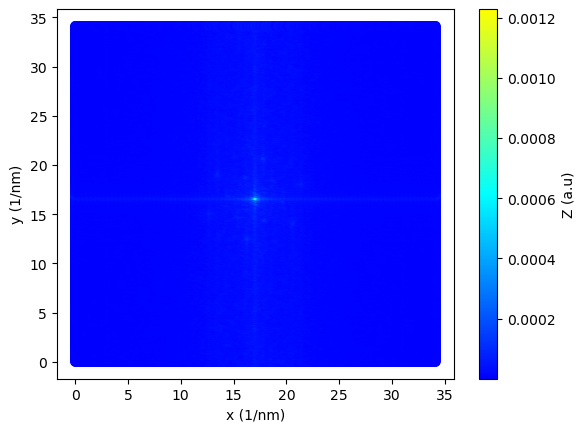

In [5]:
fig1, ax1 = plt.subplots()

# Increase Contrast
colors_custom = [(0, 'blue'), (0.5, 'cyan'), (1, 'yellow')]  # Define color points
cmap_custom = LinearSegmentedColormap.from_list('custom', colors_custom)

sc1 = ax1.scatter(df['X'], df['Y'], c=df['Z'] * 10, cmap=cmap_custom)
cb1 = plt.colorbar(sc1, ax=ax1)
cb1.set_label('Z (a.u)')
ax1.set_xlabel("x (1/nm)")
ax1.set_ylabel("y (1/nm)")

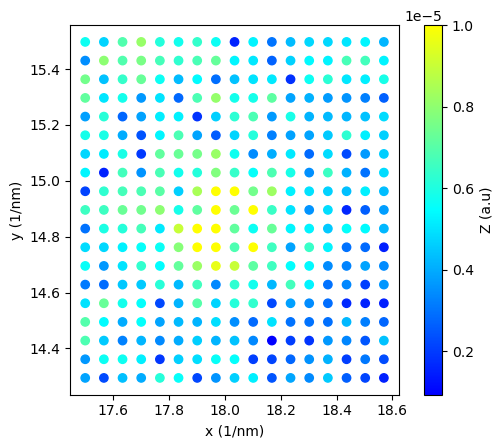

In [11]:
# Zoom In
fig2, ax2 = plt.subplots()

# Increase Contrast
colors_custom = [(0, 'blue'), (0.5, 'cyan'), (1, 'yellow')]  # Define color points
cmap_custom = LinearSegmentedColormap.from_list('custom', colors_custom)

x1, x2 = 17.5, 18.6
y1, y2 = 14.25, 15.5
# Around Dot
df_sub = df[(df['X'] >= x1) & (df['X'] <= x2) & (df['Y'] >= y1) & (df['Y'] <= y2)]

sc2 = ax2.scatter(df_sub['X'], df_sub['Y'], c=df_sub['Z'], cmap=cmap_custom, vmax=1e-5)
cb2 = plt.colorbar(sc2, ax=ax2)
cb2.set_label('Z (a.u)')
ax2.set_xlabel("x (1/nm)")
ax2.set_ylabel("y (1/nm)")
ax2.set_aspect('equal')
#ax2.set_xlim(9, 10)
#ax2.set_ylim(5.5, 7)

In [12]:
# Now We Do Fit
def twoD_Gaussian(xy, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    x, y = xy
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

In [13]:
#labels = ["amplitude", "x0", "y0", "dx", "dy", "theta", "offset"]
#param0 = [1.6 * 1e-5, 17.8, 15, 2, 2, 0, 1]
lb = [1e-7, 17.6, 14.4, 0, 0, -3.14, 0]
ub = [1e-4, 18.6, 15.5, 10, 10, 3.14, 10]
popt, pcov = opt.curve_fit(twoD_Gaussian, (df_sub['X'], df_sub['Y']), df_sub['Z'], bounds=(lb, ub))

In [14]:
labels = ["amplitude", "x0", "y0", "dx", "dy", "theta", "offset"]
ffloats = [f"{l}: {num:.4e}" for (l,num) in zip (labels,popt)]
formatted_string = ", ".join(ffloats)
print(formatted_string)

amplitude: 1.0008e-07, x0: 1.8100e+01, y0: 1.4950e+01, dx: 5.0000e+00, dy: 5.0000e+00, theta: 0.0000e+00, offset: 7.6555e-06


In [15]:
xlin = np.linspace(x1, x2, 100)
ylin = np.linspace(y1, y2, 100)

xx, yy = np.meshgrid(xlin, ylin)

zz = twoD_Gaussian((xx, yy), *popt)

x = xx.flatten()
y = yy.flatten()
z = zz.flatten()

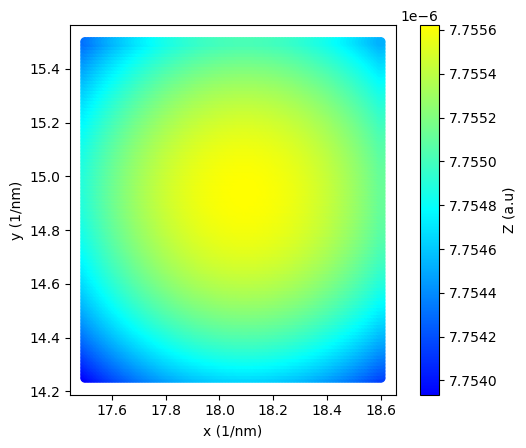

In [16]:
fig3, ax3 = plt.subplots()

sc3 = ax3.scatter(x, y, c=z, cmap=cmap_custom)
cb3 = plt.colorbar(sc3, ax=ax3)
cb3.set_label('Z (a.u)')
ax3.set_xlabel("x (1/nm)")
ax3.set_ylabel("y (1/nm)")
ax3.set_aspect('equal')

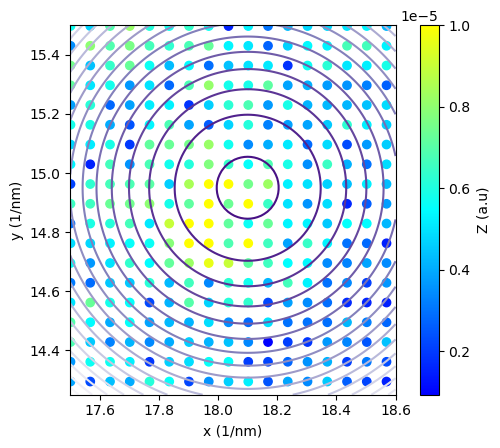

In [20]:
fig4, ax4 = plt.subplots()

sc4 = ax4.scatter(df_sub['X'], df_sub['Y'], c=df_sub['Z'], cmap=cmap_custom, vmax=1e-5)
cb4 = plt.colorbar(sc4, ax=ax4)
ax4.contour(xx, yy, zz.reshape(len(xlin), len(xlin)), levels=20, cmap='Purples')
cb4.set_label('Z (a.u)')
ax4.set_xlabel("x (1/nm)")
ax4.set_ylabel("y (1/nm)")
ax4.set_aspect('equal')